## 1. Построить гистограмму.
Постройте гистограммы распределения цен для каждой категории (по количеству комнат).
Какие выводы можно сделать на основе полученных гистограмм?

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statistics
from scipy import stats
from statsmodels.stats import weightstats as stests

In [2]:
rent = pd.read_excel('house_prices.xlsx')
rent.head(3)

,No,Rooms,DistMetro,Area,Price
0,1,3,12,56,9396
1,2,2,4,54,9785
2,3,1,2,31,5783


In [3]:
rent['Rooms'].unique()

array([3, 2, 1], dtype=int64)

In [4]:
rent_1r = rent[rent['Rooms'] == 1]
rent_2r = rent[rent['Rooms'] == 2]
rent_3r = rent[rent['Rooms'] == 3]

Text(0, 0.5, 'Количество')

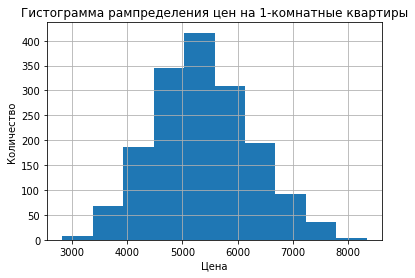

In [5]:
one_room = rent_1r['Price'].hist()
one_room.set_title('Гистограмма рампределения цен на 1-комнатные квартиры')
one_room.set_xlabel('Цена')
one_room.set_ylabel('Количество')

Text(0, 0.5, 'Количество')

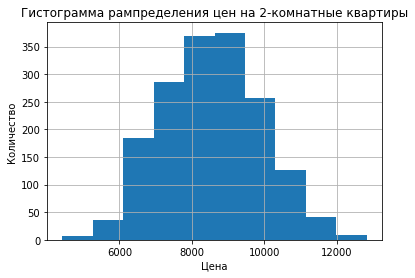

In [6]:
two_room = rent_2r['Price'].hist()
two_room.set_title('Гистограмма рампределения цен на 2-комнатные квартиры')
two_room.set_xlabel('Цена')
two_room.set_ylabel('Количество')

Text(0, 0.5, 'Количество')

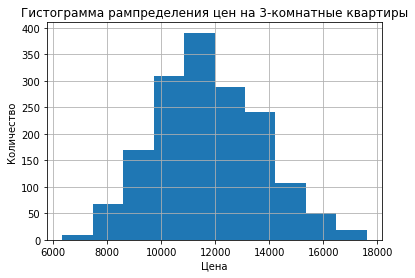

In [7]:
three_room = rent_3r['Price'].hist()
three_room.set_title('Гистограмма рампределения цен на 3-комнатные квартиры')
three_room.set_xlabel('Цена')
three_room.set_ylabel('Количество')

Для всех трех случаев распределение стремится к нормальному.

Диапазон цен сдвигается в большую сторону от увеличения количества комнат.

## 2. Оценить корреляцию
Используя знакомые вам методы, дайте оценку корреляции цены и площади квартиры отдельно по каждой категории (по количеству комнат). Какие выводы можно сделать из этой оценки?

In [8]:
one_room_corr, p_v_1 = pearsonr(rent_1r['Price'], rent_1r['Area'])
two_room_corr, p_v_2 = pearsonr(rent_2r['Price'], rent_2r['Area'])
three_room_corr, p_v_3 = pearsonr(rent_3r['Price'], rent_3r['Area'])
all_corr, p_v_4 = pearsonr(rent['Price'], rent['Area'])
print(one_room_corr, two_room_corr, three_room_corr, '\n', 'Общая корреляция: ', all_corr)

0.6528312289899474 0.7058155230162513 0.744723419970319 
 Общая корреляция:  0.9403451703395281


С увеличением количества комнат увеличивается влияние фактора площади на стоимость квартиры.

В целом переменные цена и площадь имеют сильную прямую корреляцию.

## 3. Рассчитать квартили
Рассчитайте границы квартилей распределения цен на 2х квартиры площадью более 40 кв. метров.

In [9]:
price_two_room = rent_2r['Price'][rent['Area'] > 40]
price_two_room.quantile([.25, .50, .75]) 

0.25    7924.0
0.50    8812.0
0.75    9684.5
Name: Price, dtype: float64

## 4. Решить задачу
Вы являетесь риелтором, ваша прибыль это комиссия 3% от суммы сделки купли-продажи квартир (цена квартиры). В текущем квартале у вас ожидается 25 сделок купли-продажи 3-х комнатных квартир. Оцените вероятность того, что ваша суммарная прибыль от этих продаж превысит 9 млн. 200 тыс.*В каждой категории разная степень корреляции. Т.е. у 3 комнатных она может быть иная, чем у однокомнатных.

Рассчитаем среднее ожидаемых продаж:

In [62]:
9200 / 25 / 3 * 100

12266.666666666668

In [69]:
ztest, pval = stests.ztest(rent_3r.Price, x2=None, value=12266.666666666668)
pval

8.199619402642751e-27

p-value > 0.05 значит вероятность достижения этой суммы высокая

## 5. Решить задачу
Рассчитать дисперсию стоимости кв.метра в каждой категории. Как меняется дисперсия с количеством комнат? Есть ли (и какая) связь с изменением коэффициента корреляции?

In [11]:
rent['price_for_m2'] = rent['Price'] / rent['Area']

In [14]:
rent_1r = rent[rent['Rooms'] == 1]
rent_2r = rent[rent['Rooms'] == 2]
rent_3r = rent[rent['Rooms'] == 3]

In [21]:
print(
    statistics.variance(rent_1r.price_for_m2), 
    statistics.variance(rent_2r.price_for_m2), 
    statistics.variance(rent_3r.price_for_m2)
 )

580.0932409185209 420.13502667698214 381.64918080343705


Дисперсия уменьшается с увиличением количиства комнат.

Чем выше коэффициент корреляции тем меньше дисперсия.